In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('REGISTROS DIC-2018-AGOSTO-2024.csv', encoding='ISO-8859-1')

In [3]:
df.describe()

,Unnamed: 0
count,46834.000000
mean,23496.006939
std,13641.385004
min,1.000000
25%,11709.250000
50%,23417.500000
75%,35125.750000
max,47512.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46834 entries, 0 to 46833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               46834 non-null  int64 
 1   Proveedor                46834 non-null  object
 2   Nombre Comercial         674 non-null    object
 3   No de Registro           46834 non-null  object
 4   Fecha de Registro        46834 non-null  object
 5   Naturaleza del Contrato  46834 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [5]:
df = df.set_index('Unnamed: 0')
df.index.name = 'Id'
df = df.drop(['Nombre Comercial'], axis = 1)

In [6]:
distinct_count = df['Naturaleza del Contrato'].unique()
print(distinct_count)

['Compraventa de vehículos usados' 'Sin Naturaleza'
 'Compraventa de motocicletas nuevas'
 'Prestación de servicios de tintorería, lavandería y planchaduría'
 'Arrendamiento de vehículos'
 'Prestación de servicios de eventos sociales'
 'Prestación de servicios de reparación y/o mantenimiento de vehículos'
 'Prestación de servicios de atención médica por cobro directo'
 'Compraventa de muebles de línea y sobre medida'
 'Prestación de servicios de estacionamiento'
 'Mutuo con interés y garantía prendaría'
 'Prestación de servicios de reparación, mantenimiento y recarga de extintores'
 'Prestación de servicios de hospedaje'
 'Prestación de servicios privados de seguridad y vigilancia'
 'Compraventa de bien inmueble'
 'Prestación de servicios de intermediación para la compraventa inmobiliaria'
 'Prestación de servicios para el cuidado de animales'
 'Compraventa de materiales para construcción'
 'Arrendamiento de salón y accesorios para fiestas'
 'Prestación de servicios funerarios'
 'Prest

In [7]:
contract_categories = {
    "Transporte": [
        'Prestación de servicios de transporte de pasajeros',
        'Compraventa de vehículos usados',
        'Compraventa de motocicletas nuevas',
        'Arrendamiento de vehículos',
        'Prestación de servicios de reparación y/o mantenimiento de vehículos',
        'Prestación de servicios de consignación de vehículos usados',
        'Prestación de servicios de estacionamiento',
        'Serv de traslado y custodia de vehíc mediante acomod pers valet parking',
        'Prestación de servicios de recolección, traslado y entrega de valores',
        'Prestación de servicios de auxilio vial'
    ],
    "Construcción": [
        'Compraventa de bien inmueble',
        'Compraventa de materiales para construcción',
        'Prestación de servicios de remozamiento y mantenimiento de inmuebles',
        'Prestación de servicios de administración de inmuebles'
    ],
    "Servicios Financieros": [
        'Mutuo con interés y garantía prendaría',
        'Apertura de crédito',
        'Prestación de servicios de autofinanciamiento',
        'Prestación de servicios de investigación y gestión de crédito'
    ],
    "Comercio": [
        'COMERCIO ELECTRÓNICO',
        'Compraventa de productos alimenticios',
        'Compraventa de ropa y accesorios de vestir',
        'Compraventa de equipo y maquinaria',
        'Fabricación de productos',
        'Compraventa del medidor y del sistema de medición de agua',
         'Compraventa de muebles de línea y sobre medida',
        'Compraventa de vehículos nuevos',
        'Compraventa de bien mueble',
        'Compraventa de libros, revistas y material educativo',
        'COMERCIO ELECTRÓNICO',
        'Comercialización de animales y sus accesorios'
        
    ],
    "Servicios de Seguridad y Vigilancia": [
        'Prestación de servicios privados de seguridad y vigilancia'
    ],
    "Servicios de Hospedaje y Tiempo Compartido": [
        'Prestación de servicios de hospedaje',
        'Prestación de servicios de tiempo compartido',
                'Prestación de servicios de tiempo compartido.'
    ],
    "Servicios de Publicidad y Asesoría": [
        'Prestación de servicios de Publicidad',
        'Prestación de servicios de asesoria',
        'Prestación de servicios de selección de personal'
    ],
    "Servicios Generales": [
        'Sin Naturaleza',
        'No aplica ninguna de las naturalezas mostradas',
        'Comercialización de paquetes de graduación',
        'Arrendamiento de equipo y o maquinaria',
        'Servicios de designación de Fideicomisarios en materia inmobiliaria',
        'Arrendamiento de video-audio gramas',
        'Servicio para la utilizacion de bienes para la atencion medica',
        'Prestación de servicios de atención médica por cobro directo',
        'Prestación de servicios de intermediación para la compraventa inmobiliaria',
        'Prestación de servicios de reparación de bien mueble',
        'Servicios de reparación y/o mant de aparatos electrodomesticos o a base de gas',
        'Prestación de servicios de mensajeria y paquetería',
                'Prestación de servicios de formación para el trabajo y capacitación técnica',
         'Prestación de servicios de suministro de energía eléctrica',
        'Prestación de servicios de suministro de gas',
       
    ],
    "Tecnología": [
        'Prestación de servicios de certificación de CFDI',
        'Prestación de servicios de radiolocalización satelital (GPS)',
        'Prestación de servicios de reparación y/o mantenimiento de equipo',
        'Prestación de servicios de calibración'
    ],
    "Servicios Diversos": [
        'Prestación de servicios de reparación, mantenimiento y recarga de extintores',
        'Prestación de servicios funerarios',
        'Mediación para la prestación de servicios turísticos',
        'Servicios de reparación y/o mant de aparatos electrodomésticos o a base de gas',
        'Prestación de servicios de uso y disfrute de instalaciones deportivas (GIMNASIO)',
        'Servicio para la utilizacion de bienes para la atencion medica',
        'Prestación de servicios de afiliación',
        'Compraventa de artículos de papelería de oficina',
        'Prestación de servicios fotográficos, laboratorio fotográfico y grabación en video',
        'Prestación de servicios de fletes y mudanzas',
        'Prestación de servicios de tintorería, lavandería y planchaduría',
        'Prestación de servicios de eventos sociales',
         'Prestación de servicios para el cuidado de animales',
        'Arrendamiento de salón y accesorios para fiestas',
        'Prestación de servicios educativos',
        'Prestación de servicios de alimentos para eventos sociales',
        'Prestación de servicios de reparación de bien mueble',
        'Servicios de reparación y/o mant de aparatos electrodomesticos o a base de gas',
        'Prestación de servicios de embellecimiento físico',
        'Prestación de servicios fotográficos, laboratorio fotográfico y grabación en vid',
        'Prestación de servicios de adiestramiento de animales',
        'Prestación de servicios de suministros de agua purificada',
        'Prestación de servicios funerarios de mascotas',
        'Prestación de servicios de administración de becas educativas',
        'Prestación de servicios de investigación privada'
    ]
}

def classify_contract(contrato):
    for category, contratos in contract_categories.items():
        if contrato in contratos:
            return category
    return "Sin Categoría"

In [8]:
df['category'] = df['Naturaleza del Contrato'].apply(classify_contract)

In [9]:
df[df['category'] == 'Sin Categoría' ]['Naturaleza del Contrato'].unique()

array([], dtype=object)

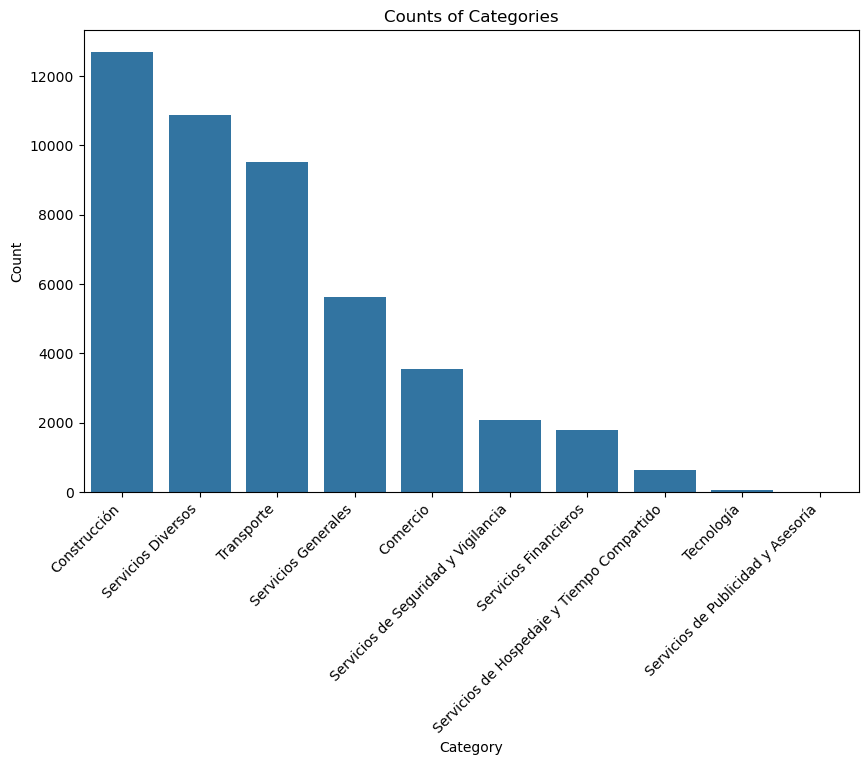

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'category' is the column with the categories
category_counts = df['category'].value_counts()

# Set up the plot
plt.figure(figsize=(10,6))

# Create the bar chart using seaborn
sns.barplot(x=category_counts.index, y=category_counts.values)

# Add titles and labels
plt.title('Counts of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


In [11]:
category_counts

category
Construcción                                  12688
Servicios Diversos                            10862
Transporte                                     9523
Servicios Generales                            5628
Comercio                                       3552
Servicios de Seguridad y Vigilancia            2077
Servicios Financieros                          1797
Servicios de Hospedaje y Tiempo Compartido      649
Tecnología                                       51
Servicios de Publicidad y Asesoría                7
Name: count, dtype: int64